## Gradient Descent Example

Text(0.5, 0, 'x2')

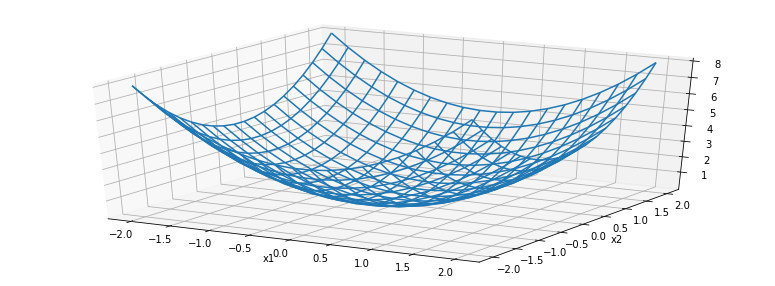

In [423]:
from numpy import linspace, meshgrid
x1 = linspace(-2, 2, 20)
x2 = linspace(-2, 2, 20)
X1, X2 = meshgrid(x1, x2)
def func(x1,x2):
    return (x1**2 + x2**2)
f = func(X1,X2)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure, xlabel, ylabel
import matplotlib.pyplot as plt
%matplotlib inline
fig = figure(figsize=(30, 5))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_wireframe(X1, X2, f)
xlabel('x1')
ylabel('x2')

## Generate Data

In [315]:
# From: https://stackoverflow.com/questions/17129290/numpy-2d-and-1d-array-to-latex-bmatrix
def nparray_to_bmatrix(a):
    """Returns a LaTeX bmatrix"""
    assert len(a.shape) <= 2, 'bmatrix can at most display two dimensions'
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

from IPython.display import Math
def gen_problem(m, n):
    from numpy import arange, tile, cumprod, insert, ones
    # 1 + x + x^2 + ... + x^n, x = 0:m
    X = np.empty((m, n+1))
    x_col = arange(m).reshape((m, 1)) # 0, 1, 2, ..., m-1
    X[:, 0] = 1.0
    X[:, 1:] = tile(x_col, reps=(1, n))
    X[:, 1:] = cumprod(X[:, 1:], axis=1)
    theta = ones((n+1, 1))
    y = np.sum(X, axis=1).reshape((m, 1))
    return X, y, theta

print("Sample generated problem:")
m, n = 10, 2
X, y, theta_true = gen_problem(m, n)

display(Math(r'X = {}, \quad y = {} \quad \implies \quad \theta^* = {}'.format(nparray_to_bmatrix(X),
                                                                               nparray_to_bmatrix(y),
                                                                               nparray_to_bmatrix(theta_true))))

Sample generated problem:


<IPython.core.display.Math object>

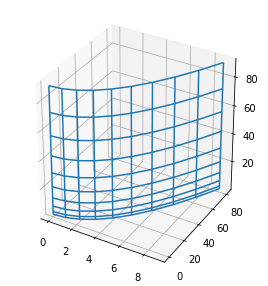

In [316]:
%matplotlib inline
fig = figure(figsize=(10, 5))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_wireframe(X[:,1], X[:,2], y)

## Solving using Normal Equation

Next, observe that the normal equations can be transformed if we substitute :

 $\theta= (X.X^T)^{-1}.X^T.y$


In [19]:
def calc_lse(X,y,theta):
    return np.mean((X.dot(theta) - y)**2)
def normal_eq(X,y):
    a = X.T.dot(X)
    b = np.linalg.inv(a)
    return (b.dot(X.T).dot(y))

In [318]:
theta = normal_eq(X,y)
e = calc_lse(X,y,theta)
print('Theta : \n{}\nLSE: \n {} \n'.format(theta,e))

Theta : 
[[1.]
 [1.]
 [1.]]
LSE: 
 1.1376320886373255e-25 



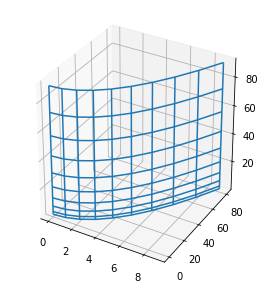

In [319]:
%matplotlib inline
fig = figure(figsize=(10, 5))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_wireframe(X[:,1], X[:,2], X.dot(theta))

## Solving using np.linalg.lstq

In [321]:
l = np.linalg.lstsq(X,y,rcond=None)
e = calc_lse(X,y,l[0])
print('Theta : \n{}\nLSE: \n {} \n'.format(theta,e))

Theta : 
[[1.]
 [1.]
 [1.]]
LSE: 
 2.7834957040723403e-28 



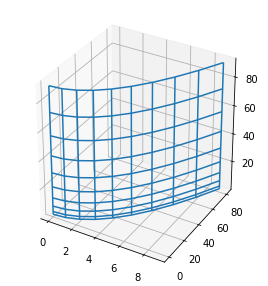

In [323]:
%matplotlib inline
fig = figure(figsize=(10, 5))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_wireframe(X[:,1], X[:,2], X.dot(l[0]))

## Solving using SKlearn LinearRegressor

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [325]:
X_act = X.copy()
X_act = X[:,1:3]
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_act, y)
predictions = linear_reg_model.predict(X_act)
mse = mean_squared_error(predictions, y)
print(mse)


2.3113624522975646e-29


In [326]:
theta1 = linear_reg_model.intercept_
theta2 = linear_reg_model.coef_
theta = np.c_[theta1,theta2].T
e = calc_lse(X,y,theta)
print('Theta : \n{}\nLSE: \n {} \n'.format(theta,e))

Theta : 
[[1.]
 [1.]
 [1.]]
LSE: 
 2.3113624522975646e-29 



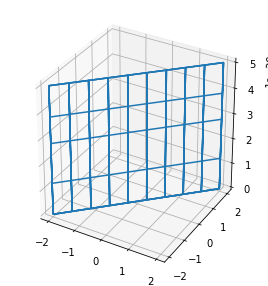

In [327]:
x1 = linspace(-2, 2, 10)
x2 = linspace(-2, 2, 10)
%matplotlib inline
fig = figure(figsize=(10, 5))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_wireframe(x1, x2, ((X.dot(theta)-y)**2))

## Reducing One feature to see the gradient descent

In [328]:
X_act = X.copy()
X_act = X[:,1:2]
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_act, y)
predictions = linear_reg_model.predict(X_act)
mse = mean_squared_error(predictions, y)
print(mse)

52.80000000000003


In [329]:
theta1 = linear_reg_model.intercept_
theta2 = linear_reg_model.coef_
theta = np.c_[theta1,theta2].T
X_temp = np.c_[np.ones((10,1)),X_act]
e = calc_lse(X_temp,y,theta)
print('Theta : \n{}\nLSE: \n {} \n'.format(theta,e))

Theta : 
[[-11.]
 [ 10.]]
LSE: 
 52.80000000000003 



In [409]:
t1 = np.c_[1.,1.].T
print(t1)
calc_lse(X_temp,y,t1)

[[1.]
 [1.]]


1533.3

In [426]:
x1 = linspace(-20, 20, 20)
x2 = linspace(-20, 20, 20)
X1, X2 = meshgrid(x1, x2)
%matplotlib inline
def costf(x1,x2):
    row = 0
    col = 0
    j_theta = np.zeros(x1.shape)
    for i,j in zip(x1,x2):
        for a,b in zip(i,j):
            t = np.c_[a,b].T
            j_theta[row,col] = np.mean((X_temp.dot(t) - y)**2)
            col += 1
        col = 0
        row+= 1
    return j_theta
f = costf(X1,X2)

Text(0.5, 0, 'theta2')

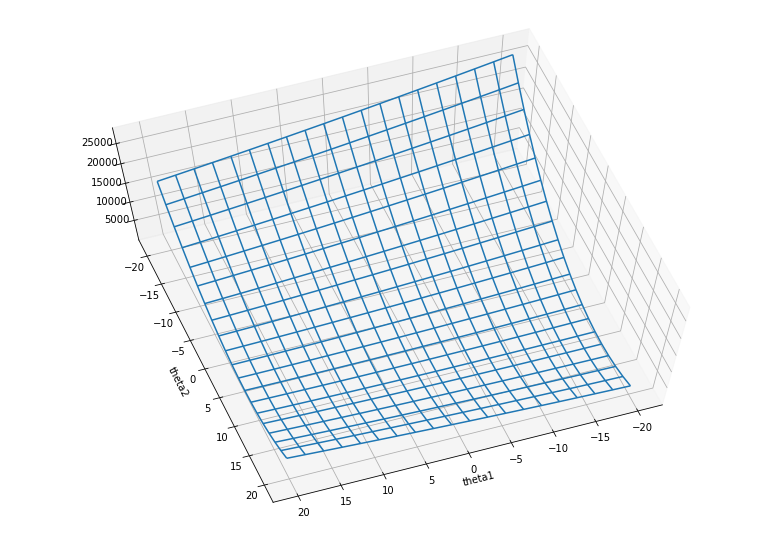

In [435]:
fig = figure(figsize=(30, 10))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_wireframe(X1, X2, f)
ax3d.view_init(70, 70)
xlabel('theta1')
ylabel('theta2')
# for angle in range(0, 360):
#     ax3d.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

**Real Example from SF**

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
temp = pd.read_csv('car_price.csv')
temp.columns
data = temp[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'
            ]]
data['Current_Year'] = 2020

In [129]:
data.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Current_Year
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2020
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2020
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2020
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2020
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,2020


In [130]:
data['# Years'] = data['Current_Year'] - data['year']


In [131]:
to_drop = ['Current_Year','year','torque','max_power','seller_type','owner']
data.drop(to_drop, inplace = True, axis = 1)

In [132]:
data['engine']= data['engine'].str.replace('[^\d.]', '',regex = True).astype(float)


In [133]:
data['mileage'] = data['mileage'].str.replace('[^\d.]', '',regex = True).astype(float)


In [134]:
data.head()


,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,Diesel,Manual,23.40,1248.0,5.0,6
1,370000,120000,Diesel,Manual,21.14,1498.0,5.0,6
2,158000,140000,Petrol,Manual,17.70,1497.0,5.0,14
3,225000,127000,Diesel,Manual,23.00,1396.0,5.0,10
4,130000,120000,Petrol,Manual,16.10,1298.0,5.0,13


In [135]:
data.replace(to_replace = ['Diesel','Petrol','LPG','CNG'],value=[1,2,3,4],inplace = True)


In [136]:
data.head()


,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,1,Manual,23.40,1248.0,5.0,6
1,370000,120000,1,Manual,21.14,1498.0,5.0,6
2,158000,140000,2,Manual,17.70,1497.0,5.0,14
3,225000,127000,1,Manual,23.00,1396.0,5.0,10
4,130000,120000,2,Manual,16.10,1298.0,5.0,13


In [137]:
data.replace(to_replace = ['Manual','Automatic'],value=[1.0,2.0],inplace = True)

In [138]:
data.head()


,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,1,1.0,23.40,1248.0,5.0,6
1,370000,120000,1,1.0,21.14,1498.0,5.0,6
2,158000,140000,2,1.0,17.70,1497.0,5.0,14
3,225000,127000,1,1.0,23.00,1396.0,5.0,10
4,130000,120000,2,1.0,16.10,1298.0,5.0,13


Mean imputation

In [140]:
data.isnull().values.sum()

663

In [109]:
data = data.fillna(data.mean())

Checking if there are null values

In [111]:
data.isnull().values.sum()

0

Data Pre-processing ends

Prepare test and tran data

In [112]:
data.head(25)

,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,-0.233514,1.338280,-0.869729,-0.385135,9.998346e-01,-4.237779e-01,-4.402971e-01,-0.048461
1,-0.332739,0.887356,-0.869729,-0.385135,4.322628e-01,7.922253e-02,-4.402971e-01,-0.048461
2,-0.595683,1.241022,0.953158,-0.385135,-4.316518e-01,7.721053e-02,-4.402971e-01,1.929656
3,-0.512583,1.011139,-0.869729,-0.385135,8.993795e-01,-1.260016e-01,-4.402971e-01,0.940598
4,-0.630412,0.887356,0.953158,-0.385135,-8.334725e-01,-3.231778e-01,-4.402971e-01,1.682392
5,-0.245917,-0.438891,0.953158,-0.385135,1.811249e-01,-5.263899e-01,-4.402971e-01,-0.790255
6,-0.672582,1.859937,2.776045,-0.385135,-5.321069e-01,-8.000222e-01,-4.402971e-01,1.682392
7,-0.735838,-1.146222,0.953158,-0.385135,-8.334725e-01,-1.333203e+00,-1.496876e+00,3.165980
8,-0.357545,0.356857,-0.869729,-0.385135,1.047551e+00,-1.903857e-01,-4.402971e-01,0.693333
9,-0.543591,1.753838,-0.869729,-0.385135,1.459656e-01,-1.199656e-01,-4.402971e-01,0.198804


In [113]:
data = (data - data.mean())/data.std()
X = data.iloc[:,1:8]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = data.iloc[:,0:1].values 
theta = np.zeros([1,8])
print(X)

[[ 1.          1.33828022 -0.86972865 ... -0.42377786 -0.44029709
  -0.04846121]
 [ 1.          0.88735626 -0.86972865 ...  0.07922253 -0.44029709
  -0.04846121]
 [ 1.          1.24102211  0.95315801 ...  0.07721053 -0.44029709
   1.92965648]
 ...
 [ 1.          0.88735626 -0.86972865 ... -0.42377786 -0.44029709
   1.18786235]
 [ 1.         -0.79255652 -0.86972865 ... -0.12600163 -0.44029709
   0.1988035 ]
 [ 1.         -0.79255652 -0.86972865 ... -0.12600163 -0.44029709
   0.1988035 ]]


In [114]:
X

array([[ 1.        ,  1.33828022, -0.86972865, ..., -0.42377786,
        -0.44029709, -0.04846121],
       [ 1.        ,  0.88735626, -0.86972865, ...,  0.07922253,
        -0.44029709, -0.04846121],
       [ 1.        ,  1.24102211,  0.95315801, ...,  0.07721053,
        -0.44029709,  1.92965648],
       ...,
       [ 1.        ,  0.88735626, -0.86972865, ..., -0.42377786,
        -0.44029709,  1.18786235],
       [ 1.        , -0.79255652, -0.86972865, ..., -0.12600163,
        -0.44029709,  0.1988035 ],
       [ 1.        , -0.79255652, -0.86972865, ..., -0.12600163,
        -0.44029709,  0.1988035 ]])

In [115]:
y

array([[-0.23351443],
       [-0.33273882],
       [-0.59568345],
       ...,
       [-0.31785516],
       [-0.43196321],
       [-0.43196321]])

In [116]:
theta = normal_eq(X,y)
e = calc_lse(X,y,theta)
print('Theta : \n{}\nLSE: \n {} \n'.format(theta,e))

Theta : 
[[-3.83373888e-15]
 [-1.04538280e-01]
 [-5.58518745e-02]
 [ 3.55355650e-01]
 [ 1.87747091e-02]
 [ 4.83918443e-01]
 [-2.12611517e-01]
 [-2.64306456e-01]]
LSE: 
 0.4379567264077876 



In [124]:
data = (data - data.mean())/data.std()
X = data.iloc[:,1:8]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = data.iloc[:,0:1].values 
theta = np.zeros([1,8])
print(X)

[[ 1.          1.33828022 -0.86972865 ... -0.42377786 -0.44029709
  -0.04846121]
 [ 1.          0.88735626 -0.86972865 ...  0.07922253 -0.44029709
  -0.04846121]
 [ 1.          1.24102211  0.95315801 ...  0.07721053 -0.44029709
   1.92965648]
 ...
 [ 1.          0.88735626 -0.86972865 ... -0.42377786 -0.44029709
   1.18786235]
 [ 1.         -0.79255652 -0.86972865 ... -0.12600163 -0.44029709
   0.1988035 ]
 [ 1.         -0.79255652 -0.86972865 ... -0.12600163 -0.44029709
   0.1988035 ]]


In [125]:
def computeCost(X,y,theta):
    with np.errstate(invalid='ignore',over='ignore'):
        tobesummed = np.power(((X @ theta.T)-y),2)
        return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        with np.errstate(invalid='ignore',over='ignore'):
            theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
            cost[i] = computeCost(X, y, theta)
    return theta,cost

In [126]:
alpha = 0.01
iters = 1000
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

[[ 3.37617073e-16 -1.03407822e-01 -7.06228959e-02  3.63774873e-01
   2.51480688e-03  4.51868433e-01 -2.02133329e-01 -2.67955488e-01]]


In [122]:
finalCost = computeCost(X,y,g)
print(finalCost)

0.21914950571622366


Text(0.5, 1.0, 'Error vs. Training Epoch')

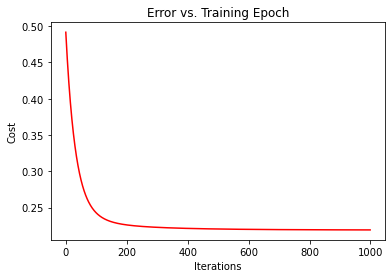

In [123]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')